<a href="https://colab.research.google.com/github/beyzassevval/Techcareer_VeriBilimi_Odevlerim/blob/main/Bitirme_%C3%96devim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


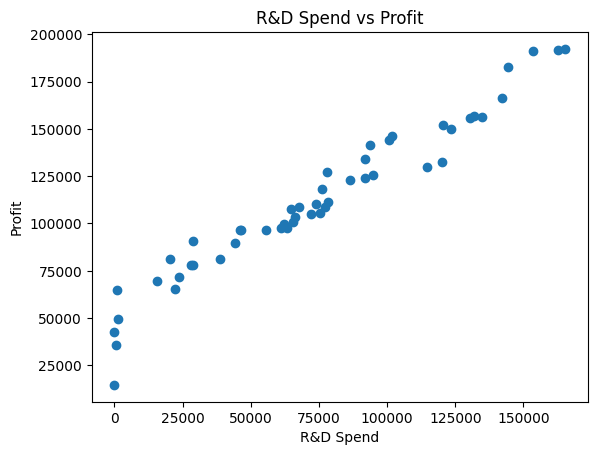

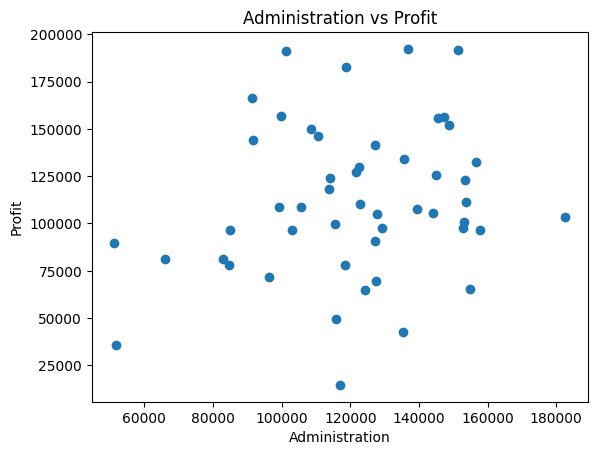

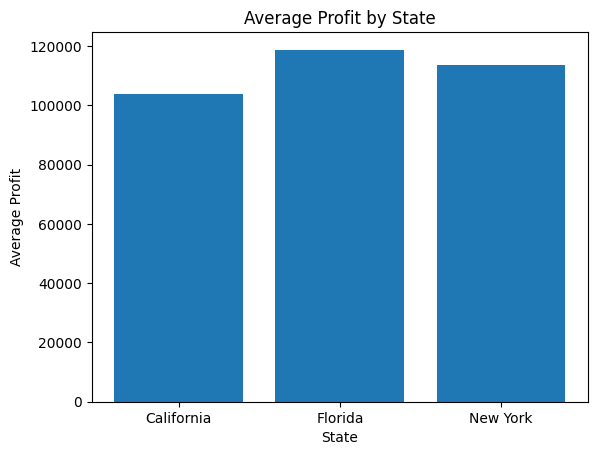

/tmp/ipython-input-3826542501.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['R&D Spend'], data['Administration'], data['Marketing Spend']], labels=['R&D Spend', 'Administration', 'Marketing Spend'])


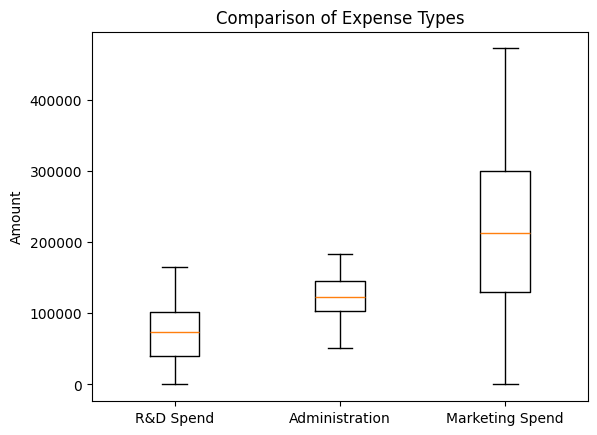

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')




data = pd.read_csv('50_Startups.csv')



print(data.head())
data.shape


# ## Bu veri seti, 50 farklı startup şirketinin çeşitli harcamalarını ve kârlılıklarını içermektedir.
#
# R&D Spend (Ar-Ge Harcaması): Şirketin araştırma ve geliştirme (Ar-Ge) için harcadığı tutar.
# Administration (Yönetim Harcaması): Şirketin yönetim giderleri için harcadığı tutar.
# Marketing Spend (Pazarlama Harcaması): Şirketin pazarlama ve reklam faaliyetleri için harcadığı tutar.
# State (Eyalet): Şirketin faaliyet gösterdiği eyalet (örneğin, New York, California, Florida).
# Profit (Kâr): Şirketin elde ettiği toplam kâr.
# Bu veri seti, startup'ların çeşitli harcama kalemleri ile kârlılıkları arasındaki ilişkileri analiz   etmek için kullanılabilir. Örneğin, Ar-Ge veya pazarlama harcamalarının kârlılık üzerindeki etkisini   incelemek için uygun bir veri setidir.

# ## 1.GÖREV : R&D Harcaması ve Kâr Arasındaki İlişki (Scatter Plot): Ar-Ge harcamaları ile kâr arasındaki ilişkiyi gösteren bir dağılım grafiği.


plt.scatter(data['R&D Spend'], data['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()






# ## 2.GÖREV: Yönetim Harcamaları ve Kâr Arasındaki İlişki (Scatter Plot): Yönetim harcamaları ile kâr arasındaki İlişkiyi gösteren bir dağılım grafiği.

plt.scatter(data['Administration'], data['Profit'])
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()






# ## 3. GÖREV: Eyaletlere Göre Ortalama Kâr (Bar Chart): Farklı eyaletlerdeki startup'ların ortalama kârlarını karşılaştıran bir çubuk grafik.

average_profit_by_state = data.groupby('State')['Profit'].mean().reset_index()
plt.bar(average_profit_by_state['State'], average_profit_by_state['Profit'])
plt.title('Average Profit by State')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.show()







# ## 4. GÖREV: Harcama Türlerinin Karşılaştırması (Boxplot): R&D, yönetim ve pazarlama harcamalarının dağılımını karşılaştıran bir kutu grafiği.
plt.boxplot([data['R&D Spend'], data['Administration'], data['Marketing Spend']], labels=['R&D Spend', 'Administration', 'Marketing Spend'])
plt.title('Comparison of Expense Types')
plt.ylabel('Amount')
plt.show()

Veri Seti Yüklendi. Sınıf Dağılımı:
Outcome
0    1.0
Name: proportion, dtype: float64
----------------------------------------------------------------------
UYARI: Tüm çıktı 0 olduğu için yapay olarak 4 satır ekleniyor...
Yeni Sınıf Dağılımı:
Outcome
0    0.98
1    0.02
Name: proportion, dtype: float64
Veri Ön İşleme Tamamlandı. Ölçekleme uygulandı.
----------------------------------------------------------------------
### Rastgele Orman Model Raporu ###

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



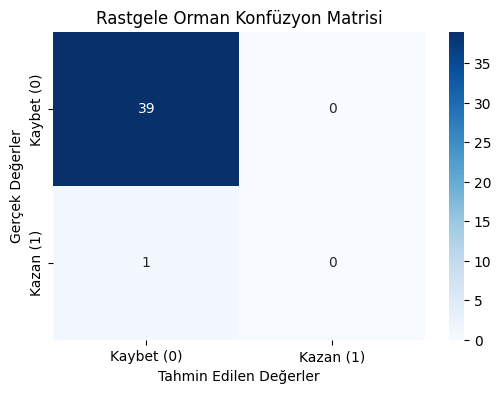

### Karar Ağacı (Düzeltilmiş) Model Raporu ###

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.00      0.00      0.00         1

    accuracy                           0.95        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.95      0.95      0.95        40



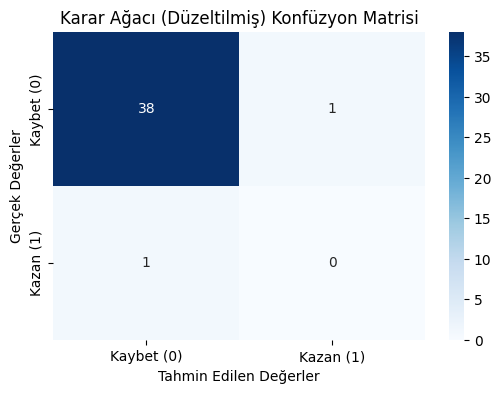

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Konfüzyon matrisini görselleştirmek için eklendi

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier # Yeni model
from sklearn.linear_model import LogisticRegression  # Yeni model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Veri setini yükleme (Varsayılan olarak /content/ yolunu deniyoruz)
try:
    data = pd.read_csv('/content/dava_sonuclari.csv')
except FileNotFoundError:
    try:
        data = pd.read_csv('dava_sonuclari.csv')
    except FileNotFoundError:
        print("Hata: 'dava_sonuclari.csv' dosyası bulunamadı. Lütfen yolu kontrol edin.")
        exit()


print("Veri Seti Yüklendi. Sınıf Dağılımı:")
print(data['Outcome'].value_counts(normalize=True))
print("-" * 70)
# Sadece modelin metrik ürettiğini görmek için GEÇİCİ ve YAPAY bir çözüm
if data['Outcome'].all() == 0:
    print("UYARI: Tüm çıktı 0 olduğu için yapay olarak 4 satır ekleniyor...")
    # Veri setinden rastgele 4 satır seçip Outcome değerini 1 yapıyoruz
    indices_to_change = data.sample(4, random_state=42).index
    data.loc[indices_to_change, 'Outcome'] = 1
    print("Yeni Sınıf Dağılımı:")
    print(data['Outcome'].value_counts(normalize=True))

## VERİ ÖN İŞLEME
data_processed = pd.get_dummies(data, columns=['Case Type'], drop_first=True)
X = data_processed.drop('Outcome', axis=1)
y = data_processed['Outcome']


# Ölçeklenecek sayısal sütunlar (Önceki kod ile aynı)
numerical_cols = [
    'Case Duration (Days)', 'Judge Experience (Years)', 'Number of Witnesses',
    'Legal Fees (USD)', 'Defendant\'s Wealth (USD)', 'Number of Evidence Items',
    'Number of Legal Precedents', 'Settlement Offered (USD)'
]

## VERİ SETİNİ AYIRMA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## ÖZELLİK ÖLÇEKLENDİRME
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Veri Ön İşleme Tamamlandı. Ölçekleme uygulandı.")
print("-" * 70)

## MODEL EĞİTİM VE DEĞERLENDİRME FONKSİYONU
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Modeli eğitir, tahmin yapar ve metrikleri raporlar."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"### {model_name} Model Raporu ###")
    print("\nSınıflandırma Raporu:")
    # classification_report, Precision, Recall ve F1'ı her sınıf için gösterir
    print(classification_report(y_test, y_pred, zero_division=0))

    # Konfüzyon Matrisi Görselleştirme
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Kaybet (0)', 'Kazan (1)'],
                yticklabels=['Kaybet (0)', 'Kazan (1)'])
    plt.title(f'{model_name} Konfüzyon Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()


# -------------------------------------------------------------------------
# A) DENEME: RANDOM FOREST (Sınıf Dengesizliğine Daha Dirençli)
# -------------------------------------------------------------------------
# n_estimators: Ağaç sayısı. class_weight: Dengesizliği otomatik telafi etmeye çalışır.
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Rastgele Orman")
print("=" * 70)


# -------------------------------------------------------------------------
# B) DENEME: KARAR AĞACI (Tekrar Deneme)
# -------------------------------------------------------------------------
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    class_weight='balanced' # Sınıf ağırlığı eklenerek 0'a kilitlenme önlenmeye çalışılıyor
)
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Karar Ağacı (Düzeltilmiş)")
print("=" * 70)

Veri Seti Başarıyla Yüklendi. İlk 5 satır:


,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0


--------------------------------------------------------------------------------
Özellikler Ölçeklendirildi. (StandardScaler)


,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity
0,-0.709309,-0.139751,0.638760,1.634521,0.215709
1,1.037706,0.576920,1.432282,1.417741,0.215709
2,-0.667713,-1.214757,-0.729519,0.333841,-1.053167
3,-1.031674,-1.393925,-1.348320,0.622881,-1.053167
4,0.184996,1.293591,-1.434006,0.478361,-1.053167


--------------------------------------------------------------------------------
Optimal Küme Sayısını Belirleme (Elbow Metodu):


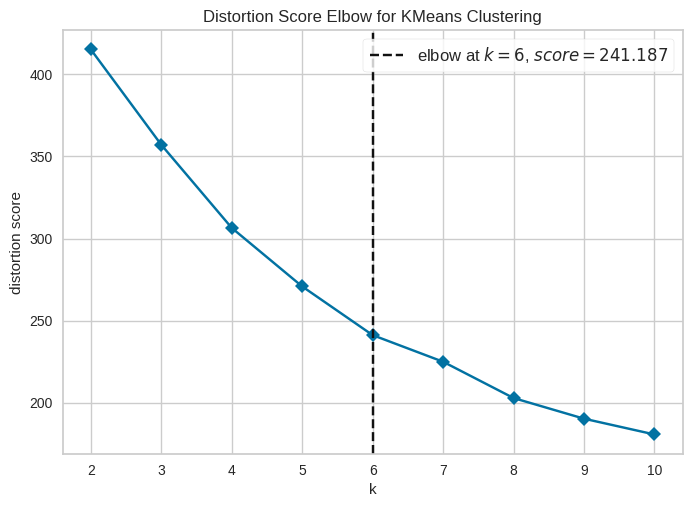


Elbow Metoduna Göre Optimal Küme Sayısı (K): 6
--------------------------------------------------------------------------------
K-Means Kümeleme Tamamlandı. Toplam 6 küme oluşturuldu.
Küme Dağılımı:
 Cluster
1    19
0    18
4    18
3    18
5    15
2    12
Name: count, dtype: int64
--------------------------------------------------------------------------------
### Küme Profilleri (Ortalama Özellik Değerleri) ###


,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity
Cluster,,,,,
0,80.055556,7.722222,23716.611111,11.222222,1.888889
1,175.842105,9.052632,42211.052632,35.157895,2.263158
2,205.083333,2.333333,26747.583333,37.000000,1.000000
3,248.500000,5.777778,14612.888889,27.111111,2.777778
4,295.555556,10.000000,28223.000000,16.833333,1.222222
5,199.000000,17.000000,21483.866667,35.533333,1.466667



Bu tablodan, her kümedeki davaların ortalama Legal Fees, Tanık Sayısı vb. değerleri görülür.


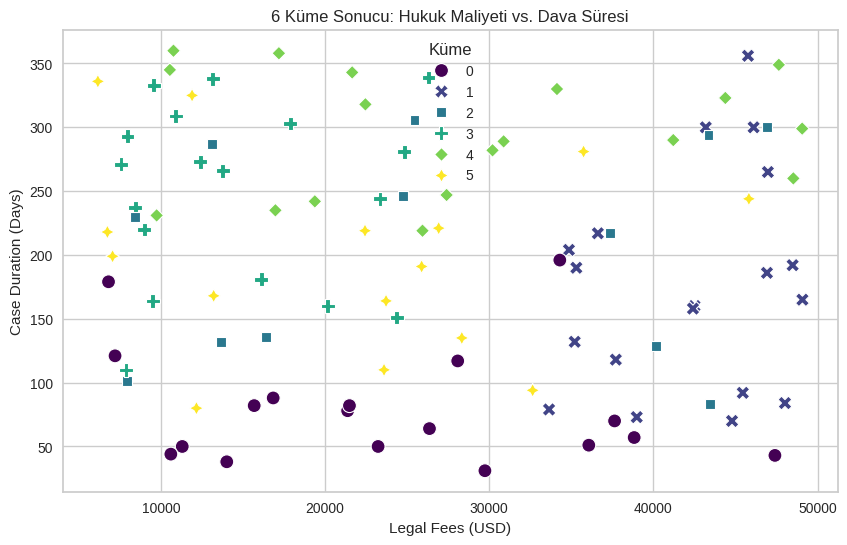

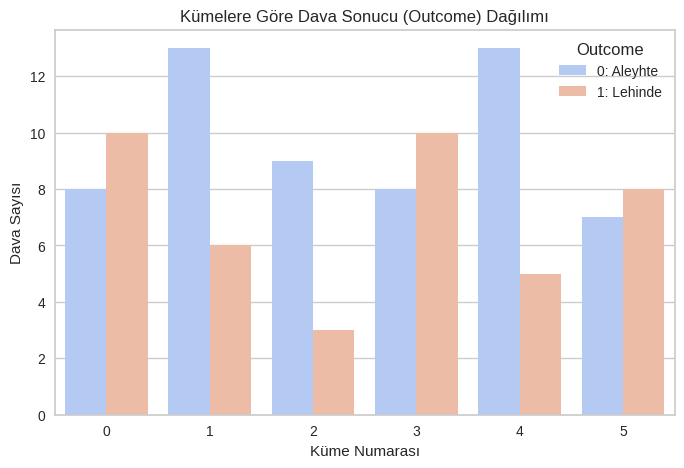

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Kümeleme kalitesini ölçmek için
from yellowbrick.cluster import KElbowVisualizer # Elbow metodunu görselleştirmek için

# Veri setini yükleme
try:
    data = pd.read_csv('/content/dava.csv')
except FileNotFoundError:
    try:
        data = pd.read_csv('dava.csv')
    except FileNotFoundError:
        print("Hata: 'dava.csv' dosyası bulunamadı. Lütfen yolu kontrol edin.")
        exit()

print("Veri Seti Başarıyla Yüklendi. İlk 5 satır:")
display(data.head())
print("-" * 80)

## VERİ ÖN İŞLEME VE ÖZELLİK SEÇİMİ

# 1. Özellik Seçimi
# 'Outcome' (Sonuç) hedef değişken olduğu için kümelemede kullanılmamalıdır.
# Kümeleme için sayısal özellikleri (Severity ve Outcome hariç) alıyoruz.
# Severity'i (1, 2, 3) sıralı bir özellik olarak alabiliriz.
features = [
    'Case Duration (Days)',
    'Number of Witnesses',
    'Legal Fees (USD)',
    'Number of Evidence Items',
    'Severity'
]
X = data[features].copy()


# 2. Özellik Ölçeklendirme (Scaling)
# K-Means, mesafeye dayalı bir algoritma olduğu için ölçeklendirme KRİTİKTİR.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Özellikler Ölçeklendirildi. (StandardScaler)")
display(X_scaled_df.head())
print("-" * 80)


## KÜME SAYISINI BELİRLEME (ELBOW METODU)

# Yellowbrick kütüphanesi ile Elbow yöntemini görselleştirme
# K aralığını 2'den 10'a kadar belirliyoruz.
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=False)

print("Optimal Küme Sayısını Belirleme (Elbow Metodu):")
visualizer.fit(X_scaled)
visualizer.show()

# Görselleştirmeden elde edilen en uygun k değerini alalım.
# Eğer görselleştirme net değilse, k=3 veya k=4 gibi mantıklı bir değer seçilebilir.
optimal_k = visualizer.elbow_value_
if optimal_k is None:
    # Elbow net değilse varsayılan bir değer seçelim (örneğin 3)
    optimal_k = 3
    print(f"\nElbow noktası net değil, varsayılan optimal K değeri: {optimal_k} olarak belirlendi.")
else:
    print(f"\nElbow Metoduna Göre Optimal Küme Sayısı (K): {optimal_k}")
print("-" * 80)


## KÜMELEME İŞLEMİ (K-MEANS)

# Optimal K değeri ile K-Means modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Küme etiketlerini orijinal veri setine ekleme
data['Cluster'] = kmeans.labels_

print(f"K-Means Kümeleme Tamamlandı. Toplam {optimal_k} küme oluşturuldu.")
print("Küme Dağılımı:\n", data['Cluster'].value_counts())
print("-" * 80)


## SONUÇLARI GÖRSELLEŞTİRME VE YORUMLAMA

# 1. Küme Özelliklerinin Ortalamasını Gösterme (Yorumlama için En İyisi)
cluster_profiles = data.groupby('Cluster')[features].mean()
print("### Küme Profilleri (Ortalama Özellik Değerleri) ###")
display(cluster_profiles)
print("\nBu tablodan, her kümedeki davaların ortalama Legal Fees, Tanık Sayısı vb. değerleri görülür.")


# 2. Kümeleme Sonuçlarının Görselleştirilmesi (2D)
# En önemli iki özellik (örneğin Case Duration ve Legal Fees) seçilir.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Legal Fees (USD)',
    y='Case Duration (Days)',
    hue='Cluster',
    data=data,
    palette='viridis',
    style='Cluster',
    s=100
)
plt.title(f'{optimal_k} Küme Sonucu: Hukuk Maliyeti vs. Dava Süresi')
plt.xlabel('Legal Fees (USD)')
plt.ylabel('Case Duration (Days)')
plt.legend(title='Küme')
plt.grid(True)
plt.show()

# 3. Sonuç (Outcome) Dağılımı İle Karşılaştırma
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Outcome', data=data, palette='coolwarm')
plt.title('Kümelere Göre Dava Sonucu (Outcome) Dağılımı')
plt.xlabel('Küme Numarası')
plt.ylabel('Dava Sayısı')
plt.legend(title='Outcome', labels=['0: Aleyhte', '1: Lehinde'])
plt.show()

In [14]:
import pandas as pd
import numpy as np



data = pd.read_csv('/content/country.csv')
print(data.head())
print(data.shape)



# ##  Country.csv dosyasının özelliği
# Bu tablo, çeşitli ülkelerle ilgili bir dizi demografik, ekonomik ve coğrafi veriyi içermektedir. Tabloda her bir satır bir ülkeyi temsil ederken, sütunlar bu ülkelerle ilgili farklı özellikleri gösterir. İşte sütunların anlamları:
#
# Country: Ülkenin adı.
# Region: Ülkenin bulunduğu bölge (örneğin, Asya, Doğu Avrupa).
# Population: Ülkenin toplam nüfusu.
# Area (sq. mi.): Ülkenin yüzölçümü (mil kare olarak).
# Pop. Density (per sq. mi.): Nüfus yoğunluğu (mil kare başına düşen kişi sayısı).
# Coastline (coast/area ratio): Sahil uzunluğunun, ülkenin toplam alanına oranı.
# Net migration: Net göç oranı (göçmenlerin ülkeye giren veya ülkeden çıkan kişi sayısına göre oranı).
# Infant mortality (per 1000 births): Bebek ölüm oranı (1000 doğum başına).
# GDP ($ per capita): Kişi başına düşen Gayri Safi Yurtiçi Hasıla (GSYİH).
# Literacy (%): Okur-yazarlık oranı.
# Phones (per 1000): Her 1000 kişi başına düşen telefon sayısı.
# Arable (%): Tarıma elverişli arazi yüzdesi.
# Crops (%): Ekilebilir ürünlerin yüzdesi.
# Other (%): Diğer arazi kullanımı yüzdesi.
# Climate: Ülkenin iklim kategorisi (numerik bir değer olarak gösterilmiş).
# Birthrate: Doğum oranı.
# Deathrate: Ölüm oranı.
# Agriculture: Tarım sektörünün ekonomideki payı.
# Industry: Sanayi sektörünün ekonomideki payı.
# Service: Hizmet sektörünün ekonomideki payı.
#

# ## Bu Dosyada Yapacağınız görevleri alt taraftan bakabilirsiniz.

# ## 1. Görev : Nüfusa Göre Azalan Sırada Sıralama:


data_sorted_population = data.sort_values(by='Population', ascending=False)
print(data_sorted_population.head())
print("-"*90)
print("-"*90)


# Nüfusa Göre Azalan Sırada Sıralama kodunu buraya yazınız

data_sorted_population = data.sort_values(by='Population', ascending=False)
print(data_sorted_population.head())
print("-"*90)
print("-"*90)






# ## 2. Görev: GDP per capita sütununa göre ülkeleri artan sırada sıralamak(Kişi başına düşen Gayri Safi Yurtiçi Hasıla).


# GDP per capita sütununa göre ülkeleri artan sırada sıralamak(Kişi başına düşen Gayri Safi Yurtiçi Hasıla). kodunu buradan yazınız.

data_sorted_gdp = data.sort_values(by='GDP ($ per capita)', ascending=True)
print(data_sorted_gdp.head())
print("-"*90)
print("-"*90)








# ## 3. Görev: Population sütunu 10 milyonun üzerinde olan ülkeleri seçmek.


# Kodunu buraya yazınız.

countries_over_10_million_population = data[data['Population'] > 10000000]
print(countries_over_10_million_population.head())


print("-"*90)
print("-"*90)




# ## 4. Görev: Literacy (%) sütununa göre ülkeleri sıralayıp, en yüksek okur-yazarlık oranına sahip ilk 5 ülkeyi seçmek.


# Kodunu buraya yazınız.

top_5_literacy = data.sort_values(by='Literacy (%)', ascending=False).head(5)
print(top_5_literacy)

print("-"*90)
print("-"*90)






# ## 5. Görev:  Kişi Başı GSYİH 10.000'in Üzerinde Olan Ülkeleri Filtreleme: GDP ( per capita) sütunu 10.000'in üzerinde olan ülkeleri seçmek.


# Kodunu buraya yazınız.

countries_over_10k_gdp = data[data['GDP ($ per capita)'] > 10000]
print(countries_over_10k_gdp.head())

print("-"*90)
print("-"*90)








# ## Görev 6 : En Yüksek Nüfus Yoğunluğuna Sahip İlk 10 Ülkeyi Seçme:
# Pop. Density (per sq. mi.) sütununa göre ülkeleri sıralayıp, en yüksek nüfus yoğunluğuna sahip ilk 10 ülkeyi seçmek.


# Kodu buraya yazınız.

top_10_pop_density = data.sort_values(by='Pop. Density (per sq. mi.)', ascending=False).head(10)
print(top_10_pop_density)
print("-"*90)
print("-"*90)


           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     